In [105]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,classification_report
from sklearn.ensemble import ExtraTreesClassifier
import os
from IPython.core.display import HTML, display

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


C:\Users\Bilal\AppData\Local\Temp\ipykernel_14200\3988685271.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [106]:
import matplotlib.pyplot as plt

In [107]:
# Loading the Dataset
import pandas as pd
data = pd.read_csv("labels.csv")
data

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [108]:
data = data.fillna('n')
data = data.drop('Unnamed: 0', axis=1)

In [109]:
# Changed the names of columns
data.rename(columns = {'text_corrected':'Text Corrected'}, inplace = True)
data.rename(columns = {'overall_sentiment':'Sentiment'}, inplace = True)

# Capatlised the first letter of Column Text Corrected 
# Lowered the rest of the sentence 
lower_c = data['Text Corrected'].str.lower()
data['Text Corrected'] = data['Text Corrected'].str.capitalize()

# 
df = data[['Text Corrected', 'Sentiment']]
# df.head(30)

In [110]:
#Filling nan values
data['Text Corrected'][4799]='Im gonna build some fancy walls ven though i have millions of extra dollars in gonna make the mexicans pay for it'
data['Text Corrected'][6781]='If donald and hillary are together on a boat in the middle of the ocean and it sinks who survives america'
data['Text Corrected'][6784]='Bruh whi this tub of margarine look like Donald Trump'
data['Text Corrected'][6786]='2016 election trump vs hillary still a better love story than twilight'

(array([1033.,    0., 3127.,    0.,    0., 2201.,    0.,  480.,    0.,
         151.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

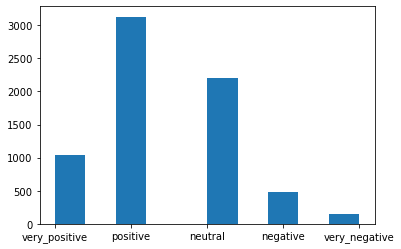

In [111]:
# To get a visulization of how the Sentiment Column is divided
plt.hist(data['Sentiment'])

In [112]:
for i in range(len(data)):
    if data['Sentiment'][i] == "very_positive":
        data['Sentiment'][i] = 'positive'
    elif data['Sentiment'][i] == "very_negative":
        data['Sentiment'][i] = 'negative'
data

,image_name,text_ocr,Text Corrected,Sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,Look there my friend lightyear now all sohalik...,positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 yearchallenge! completed in le...,positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam thorne @strippin ( follow follow saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 year challenge - sweet dee edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 year challenge with no filter 47 hilarious ...,neutral
...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is mardi gras wednesday is valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,Must watch movies of 2017 iti chennai memes ma...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,Less more talking planning soda junk food comp...,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When i have time is a fantasy. no one has time...,positive


In [113]:
# Assign numerical values to classes such as postive = 1 negative = 0 and nuteral = 2 
le = LabelEncoder().fit_transform(data['Sentiment'])


In [114]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# A RegexpTokenizer splits a string into substrings using a regular expression. 
# For example, the following tokenizer forms tokens 
# out of alphabetic sequences, money expressions, and any other non-whitespace sequences:
token = RegexpTokenizer(r'\w+|\@+|\S+|[a-zA-Z0-9]+|http.+?')
cv = CountVectorizer(stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)

# The fit method is calculating the mean and variance of each of the features present in our data. 
# The transform method is transforming all the features using the respective mean and variance.
text_counts = cv.fit_transform(df["Text Corrected"])
df


,Text Corrected,Sentiment
0,Look there my friend lightyear now all sohalik...,very_positive
1,The best of #10 yearchallenge! completed in le...,very_positive
2,Sam thorne @strippin ( follow follow saw every...,positive
3,10 year challenge - sweet dee edition,positive
4,10 year challenge with no filter 47 hilarious ...,neutral
...,...,...
6987,Tuesday is mardi gras wednesday is valentine's...,neutral
6988,Must watch movies of 2017 iti chennai memes ma...,neutral
6989,Less more talking planning soda junk food comp...,positive
6990,When i have time is a fantasy. no one has time...,very_positive


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(data['Text Corrected'])

In [116]:
vectorized

<6992x12931 sparse matrix of type '<class 'numpy.float64'>'
	with 91168 stored elements in Compressed Sparse Row format>

In [117]:
!pip install imblearn

In [119]:
X.shape, Y.shape

((12480, 12931), (12480,))

In [120]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vectorized, le, test_size = 0.2, random_state = 51)

# Model Training

In [121]:
# Training the model using Random Forrest Classifier
#                Classifier # 1
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=2, n_jobs=-9, max_depth=50, n_estimators=100, oob_score=True)
RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, n_jobs=-9, oob_score=True, random_state=2)

In [122]:
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = RFC.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")

Accuracy Score:  79.16666666666666 %


Accuracy :  79.16666666666666
Report : 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       830
           1       0.80      0.63      0.70       813
           2       0.66      0.86      0.74       853

    accuracy                           0.79      2496
   macro avg       0.81      0.79      0.79      2496
weighted avg       0.81      0.79      0.79      2496

F1 Score :  79.33984249396099


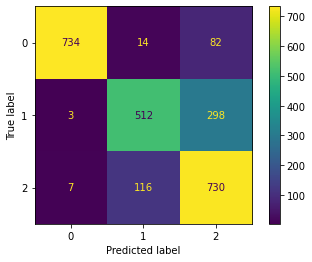

In [123]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Y_test,predicted)*100)  
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100)
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [124]:
# Training the model using Extra Trees Classifier
#                Classsifier 2
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ETC.fit(X_train, Y_train)

ExtraTreesClassifier(n_estimators=10, random_state=0)

In [125]:
# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = ETC.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")

Accuracy Score:  81.25 %


Accuracy :  81.25 %
Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       830
           1       0.76      0.74      0.75       813
           2       0.73      0.75      0.74       853

    accuracy                           0.81      2496
   macro avg       0.81      0.81      0.81      2496
weighted avg       0.81      0.81      0.81      2496

F1 Score :  81.2891370815282 %


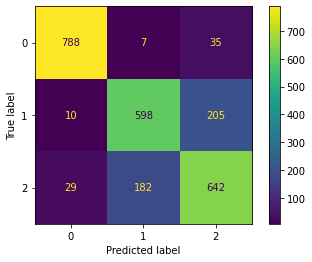

In [126]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Y_test,predicted)*100, "%")  
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100, "%")
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [127]:
# Training the model using Decision Tree Classifier
#                Classsifier 2
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [128]:
# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = DTC.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")

Accuracy Score:  62.94070512820513 %


Accuracy :  62.94070512820513 %
Report : 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       830
           1       0.54      0.54      0.54       813
           2       0.58      0.57      0.58       853

    accuracy                           0.63      2496
   macro avg       0.63      0.63      0.63      2496
weighted avg       0.63      0.63      0.63      2496

F1 Score :  62.919872671980315 %


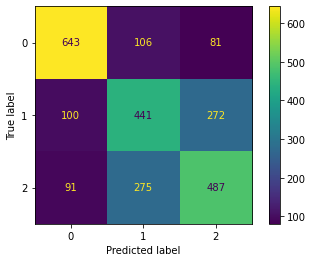

In [129]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Y_test,predicted)*100, "%")  
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100, "%")
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Images

In [130]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [131]:
import skimage
from skimage import transform

In [132]:
import os
from skimage.io import imread
from skimage.io import imread, imshow
path = r"images\\"
files = os.listdir(path)
images = []
i = 0
for file in files:
    x = skimage.transform.resize(imread(path+file, as_gray=True),(100,100))
#     x = imread(path + file, as_gray = True)
    images.append(x)
    i = i+1
    print(path+file)

images\\image_1.jpg
images\\image_10.png
images\\image_100.jpg
images\\image_1000.png
images\\image_1001.png
images\\image_1002.png
images\\image_1003.png
images\\image_1004.png
images\\image_1005.jpg
images\\image_1006.png
images\\image_1007.jpg
images\\image_1008.png
images\\image_1009.png
images\\image_101.jpg
images\\image_1010.png
images\\image_1011.png
images\\image_1012.png
images\\image_1013.png
images\\image_1014.png
images\\image_1015.png
images\\image_1016.jpg
images\\image_1017.png
images\\image_1018.jpg
images\\image_1019.jpg
images\\image_102.jpg
images\\image_1020.png
images\\image_1021.png
images\\image_1022.png
images\\image_1023.png
images\\image_1024.png
images\\image_1025.jpg
images\\image_1026.jpg
images\\image_1027.jpg
images\\image_1028.jpeg
images\\image_1029.jpg
images\\image_103.png
images\\image_1030.jpg
images\\image_1031.jpg
images\\image_1032.jpg
images\\image_1033.jpg
images\\image_1034.jpg
images\\image_1035.jpg
images\\image_1036.jpg
images\\image_1037.

images\\image_1322.jpg
images\\image_1323.jpg
images\\image_1324.jpg
images\\image_1325.jpg
images\\image_1326.jpg
images\\image_1327.jpg
images\\image_1328.jpg
images\\image_1329.jpg
images\\image_133.jpg
images\\image_1330.png
images\\image_1331.jpg
images\\image_1332.jpg
images\\image_1333.jpg
images\\image_1334.jpg
images\\image_1335.png
images\\image_1336.jpg
images\\image_1337.jpg
images\\image_1338.png
images\\image_1339.jpg
images\\image_134.jpg
images\\image_1340.jpeg
images\\image_1341.jpg
images\\image_1342.jpg
images\\image_1343.jpg
images\\image_1344.png
images\\image_1345.jpg
images\\image_1346.jpg
images\\image_1347.jpeg
images\\image_1348.jpeg
images\\image_1349.png
images\\image_135.jpg
images\\image_1350.png
images\\image_1351.png
images\\image_1352.jpg
images\\image_1353.jpg
images\\image_1354.jpg
images\\image_1355.jpg
images\\image_1356.png
images\\image_1357.jpg
images\\image_1358.png
images\\image_1359.png
images\\image_136.jpg
images\\image_1360.jpg
images\\imag

images\\image_1647.jpg
images\\image_1648.jpg
images\\image_1649.jpg
images\\image_165.jpg
images\\image_1650.jpg
images\\image_1651.jpeg
images\\image_1652.jpg
images\\image_1653.jpeg
images\\image_1654.jpg
images\\image_1655.jpg
images\\image_1656.jpeg
images\\image_1657.jpeg
images\\image_1658.jpg
images\\image_1659.jpg
images\\image_166.jpg
images\\image_1660.jpg
images\\image_1661.jpg
images\\image_1662.jpg
images\\image_1663.jpg
images\\image_1664.jpg
images\\image_1665.jpg
images\\image_1666.jpg
images\\image_1667.jpeg
images\\image_1668.png
images\\image_1669.jpg
images\\image_167.jpg
images\\image_1670.jpg
images\\image_1671.jpg
images\\image_1672.jpg
images\\image_1673.jpg
images\\image_1674.jpg
images\\image_1675.jpg
images\\image_1676.jpg
images\\image_1677.jpg
images\\image_1678.jpg
images\\image_1679.jpg
images\\image_168.jpg
images\\image_1680.png
images\\image_1681.jpg
images\\image_1682.jpg
images\\image_1683.jpg
images\\image_1684.jpg
images\\image_1685.jpg
images\\im

images\\image_197.png
images\\image_1970.jpg
images\\image_1971.jpg
images\\image_1972.png
images\\image_1973.jpg
images\\image_1974.jpg
images\\image_1975.jpg
images\\image_1976.jpg
images\\image_1977.jpeg
images\\image_1978.png
images\\image_1979.png
images\\image_198.jpg
images\\image_1980.png
images\\image_1981.jpg
images\\image_1982.jpg
images\\image_1983.jpg
images\\image_1984.png
images\\image_1985.jpg
images\\image_1986.png
images\\image_1987.jpg
images\\image_1988.jpg
images\\image_1989.jpg
images\\image_199.jpg
images\\image_1990.png
images\\image_1991.png
images\\image_1992.png
images\\image_1993.png
images\\image_1994.jpg
images\\image_1995.png
images\\image_1996.jpg
images\\image_1997.jpg
images\\image_1998.jpg
images\\image_1999.jpg
images\\image_2.jpeg
images\\image_20.png
images\\image_200.jpg
images\\image_2000.jpg
images\\image_2001.jpg
images\\image_2002.png
images\\image_2003.jpg
images\\image_2004.jpg
images\\image_2005.jpeg
images\\image_2006.jpg
images\\image_200

images\\image_2293.jpg
images\\image_2294.jpg
images\\image_2295.jpg
images\\image_2296.png
images\\image_2297.jpg
images\\image_2298.jpg
images\\image_2299.jpg
images\\image_23.jpeg
images\\image_230.jpg
images\\image_2300.jpg
images\\image_2301.png
images\\image_2302.png
images\\image_2303.png
images\\image_2304.png
images\\image_2305.png
images\\image_2306.png
images\\image_2307.png
images\\image_2308.png
images\\image_2309.jpg
images\\image_231.jpg
images\\image_2310.jpg
images\\image_2311.png
images\\image_2312.png
images\\image_2313.jpg
images\\image_2314.jpg
images\\image_2315.png
images\\image_2316.jpg
images\\image_2317.jpg
images\\image_2318.jpg
images\\image_2319.jpg
images\\image_232.jpg
images\\image_2320.jpg
images\\image_2321.jpg
images\\image_2322.jpg
images\\image_2323.jpg
images\\image_2324.jpg
images\\image_2325.jpg
images\\image_2326.jpg
images\\image_2327.jpg
images\\image_2328.jpeg
images\\image_2329.jpg
images\\image_233.png
images\\image_2330.png
images\\image_2

images\\image_2619.jpg
images\\image_262.jpg
images\\image_2620.png
images\\image_2621.png
images\\image_2622.jpg
images\\image_2623.jpg
images\\image_2624.png
images\\image_2625.jpg
images\\image_2626.jpg
images\\image_2627.jpg
images\\image_2628.jpg
images\\image_2629.jpg
images\\image_263.jpg
images\\image_2630.jpg
images\\image_2631.jpg
images\\image_2632.jpg
images\\image_2633.jpg
images\\image_2634.png
images\\image_2635.png
images\\image_2636.jpg
images\\image_2637.jpg
images\\image_2638.jpg
images\\image_2639.jpg
images\\image_264.jpg
images\\image_2640.jpg
images\\image_2641.jpg
images\\image_2642.jpg
images\\image_2643.jpg
images\\image_2644.jpg
images\\image_2645.jpg
images\\image_2646.jpg
images\\image_2647.jpg
images\\image_2648.jpg
images\\image_2649.jpg
images\\image_265.jpg
images\\image_2650.jpg
images\\image_2651.jpg
images\\image_2652.jpg
images\\image_2653.jpg
images\\image_2654.png
images\\image_2655.jpg
images\\image_2656.jpg
images\\image_2657.jpg
images\\image_2

images\\image_2946.jpg
images\\image_2947.jpeg
images\\image_2948.png
images\\image_2949.jpg
images\\image_295.jpg
images\\image_2950.jpg
images\\image_2951.png
images\\image_2952.png
images\\image_2953.jpg
images\\image_2954.png
images\\image_2955.png
images\\image_2956.jpg
images\\image_2957.jpg
images\\image_2958.png
images\\image_2959.png
images\\image_296.png
images\\image_2960.png
images\\image_2961.png
images\\image_2962.jpg
images\\image_2963.png
images\\image_2964.jpg
images\\image_2965.jpg
images\\image_2966.png
images\\image_2967.jpg
images\\image_2968.jpg
images\\image_2969.jpg
images\\image_297.jpg
images\\image_2970.png
images\\image_2971.png
images\\image_2972.jpg
images\\image_2973.png
images\\image_2974.jpg
images\\image_2975.png
images\\image_2976.png
images\\image_2977.png
images\\image_2978.jpg
images\\image_2979.png
images\\image_298.jpg
images\\image_2980.png
images\\image_2981.jpg
images\\image_2982.png
images\\image_2983.jpg
images\\image_2984.jpg
images\\image_

images\\image_3270.jpg
images\\image_3271.jpg
images\\image_3272.jpg
images\\image_3273.jpg
images\\image_3274.jpg
images\\image_3275.jpg
images\\image_3276.jpg
images\\image_3277.jpg
images\\image_3278.jpg
images\\image_3279.jpg
images\\image_328.jpg
images\\image_3280.jpg
images\\image_3281.jpeg
images\\image_3282.jpg
images\\image_3283.jpg
images\\image_3284.jpg
images\\image_3285.jpg
images\\image_3286.png
images\\image_3287.jpg
images\\image_3288.jpg
images\\image_3289.jpg
images\\image_329.jpg
images\\image_3290.jpg
images\\image_3291.png
images\\image_3292.jpg
images\\image_3293.jpg
images\\image_3294.jpg
images\\image_3295.jpg
images\\image_3296.jpg
images\\image_3297.png
images\\image_3298.jpg
images\\image_3299.png
images\\image_33.jpg
images\\image_330.jpg
images\\image_3300.png
images\\image_3301.jpg
images\\image_3302.jpg
images\\image_3303.png
images\\image_3304.png
images\\image_3305.jpg
images\\image_3306.jpg
images\\image_3307.jpg
images\\image_3308.jpg
images\\image_3

images\\image_3598.jpg
images\\image_3599.jpg
images\\image_36.jpg
images\\image_360.jpg
images\\image_3600.jpg
images\\image_3601.jpg
images\\image_3602.jpg
images\\image_3603.jpeg
images\\image_3604.jpeg
images\\image_3605.jpg
images\\image_3606.jpg
images\\image_3607.jpeg
images\\image_3608.jpg
images\\image_3609.jpg
images\\image_361.png
images\\image_3610.jpg
images\\image_3611.jpg
images\\image_3612.jpg
images\\image_3613.jpg
images\\image_3614.jpg
images\\image_3615.jpg
images\\image_3616.bmp
images\\image_3617.jpg
images\\image_3618.jpg
images\\image_3619.jpg
images\\image_362.jpg
images\\image_3620.png
images\\image_3621.png
images\\image_3622.jpg
images\\image_3623.jpg
images\\image_3624.jpg
images\\image_3625.png
images\\image_3626.png
images\\image_3627.jpg
images\\image_3628.png
images\\image_3629.png
images\\image_363.jpg
images\\image_3630.jpg
images\\image_3631.jpg
images\\image_3632.png
images\\image_3633.jpg
images\\image_3634.jpg
images\\image_3635.png
images\\image_

images\\image_392.jpg
images\\image_3920.png
images\\image_3921.jpg
images\\image_3922.jpg
images\\image_3923.png
images\\image_3924.png
images\\image_3925.jpg
images\\image_3926.jpg
images\\image_3927.jpg
images\\image_3928.png
images\\image_3929.png
images\\image_393.jpg
images\\image_3930.png
images\\image_3931.jpg
images\\image_3932.jpg
images\\image_3933.jpg
images\\image_3934.png
images\\image_3935.jpg
images\\image_3936.jpg
images\\image_3937.jpeg
images\\image_3938.png
images\\image_3939.jpeg
images\\image_394.png
images\\image_3940.png
images\\image_3941.jpeg
images\\image_3942.jpg
images\\image_3943.jpg
images\\image_3944.jpg
images\\image_3945.jpg
images\\image_3946.jpg
images\\image_3947.jpg
images\\image_3948.png
images\\image_3949.jpg
images\\image_395.png
images\\image_3950.jpg
images\\image_3951.png
images\\image_3952.jpg
images\\image_3953.jpg
images\\image_3954.jpg
images\\image_3955.png
images\\image_3956.jpg
images\\image_3957.jpeg
images\\image_3958.jpg
images\\ima

images\\image_4244.jpg
images\\image_4245.jpg
images\\image_4246.png
images\\image_4247.png
images\\image_4248.jpg
images\\image_4249.jpg
images\\image_425.jpeg
images\\image_4250.jpg
images\\image_4251.jpg
images\\image_4252.jpg
images\\image_4253.jpg
images\\image_4254.jpg
images\\image_4255.png
images\\image_4256.png
images\\image_4257.jpg
images\\image_4258.png
images\\image_4259.jpg
images\\image_426.jpg
images\\image_4260.jpg
images\\image_4261.png
images\\image_4262.jpg
images\\image_4263.jpg
images\\image_4264.jpg
images\\image_4265.jpg
images\\image_4266.jpg
images\\image_4267.jpg
images\\image_4268.jpg
images\\image_4269.jpg
images\\image_427.jpg
images\\image_4270.png
images\\image_4271.jpg
images\\image_4272.jpg
images\\image_4273.jpg
images\\image_4274.jpg
images\\image_4275.jpg
images\\image_4276.jpg
images\\image_4277.png
images\\image_4278.jpg
images\\image_4279.png
images\\image_428.jpg
images\\image_4280.png
images\\image_4281.jpg
images\\image_4282.png
images\\image_

images\\image_4572.jpg
images\\image_4573.jpeg
images\\image_4574.jpg
images\\image_4575.png
images\\image_4576.jpg
images\\image_4577.png
images\\image_4578.jpg
images\\image_4579.jpg
images\\image_458.jpg
images\\image_4580.jpg
images\\image_4581.jpg
images\\image_4582.jpg
images\\image_4583.jpg
images\\image_4584.jpg
images\\image_4585.jpg
images\\image_4586.jpg
images\\image_4587.jpg
images\\image_4588.png
images\\image_4589.jpg
images\\image_459.jpg
images\\image_4590.jpg
images\\image_4591.png
images\\image_4592.png
images\\image_4593.jpg
images\\image_4594.jpg
images\\image_4595.jpg
images\\image_4596.jpg
images\\image_4597.jpg
images\\image_4598.png
images\\image_4599.jpg
images\\image_46.jpg
images\\image_460.jpg
images\\image_4600.jpg
images\\image_4601.png
images\\image_4602.jpeg
images\\image_4603.png
images\\image_4604.jpg
images\\image_4605.jpg
images\\image_4606.jpg
images\\image_4607.png
images\\image_4608.jpg
images\\image_4609.jpg
images\\image_461.jpg
images\\image_4

images\\image_4897.jpg
images\\image_4898.png
images\\image_4899.jpg
images\\image_49.png
images\\image_490.jpg
images\\image_4900.png
images\\image_4901.png
images\\image_4902.jpg
images\\image_4903.png
images\\image_4904.jpg
images\\image_4905.jpg
images\\image_4906.jpeg
images\\image_4907.jpg
images\\image_4908.jpg
images\\image_4909.jpg
images\\image_491.jpg
images\\image_4910.jpg
images\\image_4911.png
images\\image_4912.jpg
images\\image_4913.png
images\\image_4914.jpg
images\\image_4915.jpg
images\\image_4916.jpg
images\\image_4917.jpg
images\\image_4918.jpg
images\\image_4919.png
images\\image_492.jpg
images\\image_4920.jpg
images\\image_4921.png
images\\image_4922.jpeg
images\\image_4923.png
images\\image_4924.jpg
images\\image_4925.png
images\\image_4926.jpg
images\\image_4927.jpg
images\\image_4928.jpg
images\\image_4929.jpg
images\\image_493.png
images\\image_4930.jpg
images\\image_4931.jpg
images\\image_4932.jpg
images\\image_4933.png
images\\image_4934.jpg
images\\image_4

images\\image_522.jpg
images\\image_5220.jpg
images\\image_5221.jpg
images\\image_5222.png
images\\image_5223.jpeg
images\\image_5224.png
images\\image_5225.jpeg
images\\image_5226.jpg
images\\image_5227.jpg
images\\image_5228.jpg
images\\image_5229.jpg
images\\image_523.jpg
images\\image_5230.jpg
images\\image_5231.jpg
images\\image_5232.jpg
images\\image_5233.png
images\\image_5234.jpeg
images\\image_5235.png
images\\image_5236.jpeg
images\\image_5237.jpg
images\\image_5238.jpg
images\\image_5239.jpg
images\\image_524.jpg
images\\image_5240.jpg
images\\image_5241.png
images\\image_5242.jpg
images\\image_5243.jpg
images\\image_5244.jpg
images\\image_5245.JPG
images\\image_5246.jpg
images\\image_5247.jpg
images\\image_5248.jpg
images\\image_5249.png
images\\image_525.jpg
images\\image_5250.jpg
images\\image_5251.jpg
images\\image_5252.jpg
images\\image_5253.jpg
images\\image_5254.jpg
images\\image_5255.png
images\\image_5256.jpg
images\\image_5257.png
images\\image_5258.jpg
images\\ima

images\\image_5546.png
images\\image_5547.jpg
images\\image_5548.jpg
images\\image_5549.jpg
images\\image_555.jpg
images\\image_5550.png
images\\image_5551.jpg
images\\image_5552.png
images\\image_5553.jpg
images\\image_5554.jpg
images\\image_5555.jpg
images\\image_5556.jpg
images\\image_5557.jpg
images\\image_5558.jpg
images\\image_5559.jpg
images\\image_556.jpg
images\\image_5560.jpg
images\\image_5561.jpg
images\\image_5562.jpg
images\\image_5563.jpg
images\\image_5564.jpg
images\\image_5565.png
images\\image_5566.jpg
images\\image_5567.jpg
images\\image_5568.jpg
images\\image_5569.jpg
images\\image_557.jpg
images\\image_5570.png
images\\image_5571.png
images\\image_5572.png
images\\image_5573.jpg
images\\image_5574.jpg
images\\image_5575.jpeg
images\\image_5576.jpg
images\\image_5577.jpg
images\\image_5578.jpg
images\\image_5579.jpg
images\\image_558.jpg
images\\image_5580.png
images\\image_5581.jpg
images\\image_5582.jpg
images\\image_5583.png
images\\image_5584.jpg
images\\image_

images\\image_5871.jpg
images\\image_5872.jpeg
images\\image_5873.jpg
images\\image_5874.jpg
images\\image_5875.jpeg
images\\image_5876.jpg
images\\image_5877.png
images\\image_5878.jpg
images\\image_5879.png
images\\image_588.jpg
images\\image_5880.png
images\\image_5881.png
images\\image_5882.jpg
images\\image_5883.jpg
images\\image_5884.jpg
images\\image_5885.jpg
images\\image_5886.jpg
images\\image_5887.jpg
images\\image_5888.jpg
images\\image_5889.jpg
images\\image_589.png
images\\image_5890.jpg
images\\image_5891.jpg
images\\image_5892.png
images\\image_5893.jpg
images\\image_5894.jpg
images\\image_5895.jpg
images\\image_5896.jpg
images\\image_5897.jpg
images\\image_5898.jpg
images\\image_5899.jpg
images\\image_59.jpg
images\\image_590.png
images\\image_5900.jpg
images\\image_5901.jpg
images\\image_5902.jpg
images\\image_5903.jpg
images\\image_5904.png
images\\image_5905.png
images\\image_5906.png
images\\image_5907.jpg
images\\image_5908.jpg
images\\image_5909.jpg
images\\image_

images\\image_6196.jpg
images\\image_6197.jpg
images\\image_6198.png
images\\image_6199.jpg
images\\image_62.jpg
images\\image_620.png
images\\image_6200.jpg
images\\image_6201.jpg
images\\image_6202.jpg
images\\image_6203.jpg
images\\image_6204.jpg
images\\image_6205.png
images\\image_6206.jpg
images\\image_6207.jpg
images\\image_6208.jpg
images\\image_6209.jpg
images\\image_621.jpg
images\\image_6210.png
images\\image_6211.jpeg
images\\image_6212.jpg
images\\image_6213.jpeg
images\\image_6214.jpg
images\\image_6215.jpg
images\\image_6216.jpg
images\\image_6217.jpg
images\\image_6218.jpg
images\\image_6219.jpg
images\\image_622.jpg
images\\image_6220.jpg
images\\image_6221.jpg
images\\image_6222.jpg
images\\image_6223.jpg
images\\image_6224.jpg
images\\image_6225.jpeg
images\\image_6226.jpeg
images\\image_6227.jpg
images\\image_6228.jpg
images\\image_6229.jpg
images\\image_623.jpg
images\\image_6230.png
images\\image_6231.jpg
images\\image_6232.jpg
images\\image_6233.jpg
images\\image

D:\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


images\\image_6513.png
images\\image_6514.png
images\\image_6515.jpg
images\\image_6516.jpg
images\\image_6517.jpg
images\\image_6518.jpeg
images\\image_6519.jpg
images\\image_652.jpg
images\\image_6520.png
images\\image_6521.png
images\\image_6522.jpg
images\\image_6523.png
images\\image_6524.png
images\\image_6525.png
images\\image_6526.jpg
images\\image_6527.png
images\\image_6528.png
images\\image_6529.jpg
images\\image_653.jpg
images\\image_6530.jpg
images\\image_6531.jpg
images\\image_6532.jpg
images\\image_6533.png
images\\image_6534.jpg
images\\image_6535.jpg
images\\image_6536.png
images\\image_6537.jpg
images\\image_6538.png
images\\image_6539.jpeg
images\\image_654.jpg
images\\image_6540.png
images\\image_6541.png
images\\image_6542.jpg
images\\image_6543.png
images\\image_6544.jpg
images\\image_6545.png
images\\image_6546.png
images\\image_6547.png
images\\image_6548.jpg
images\\image_6549.jpg
images\\image_655.jpg
images\\image_6550.jpg
images\\image_6551.jpg
images\\image

images\\image_6840.png
images\\image_6841.png
images\\image_6842.png
images\\image_6843.jpg
images\\image_6844.jpg
images\\image_6845.jpg
images\\image_6846.jpg
images\\image_6847.png
images\\image_6848.jpg
images\\image_6849.jpg
images\\image_685.jpg
images\\image_6850.jpg
images\\image_6851.jpg
images\\image_6852.jpg
images\\image_6853.jpeg
images\\image_6854.jpg
images\\image_6855.jpg
images\\image_6856.jpeg
images\\image_6857.jpg
images\\image_6858.jpg
images\\image_6859.png
images\\image_686.jpg
images\\image_6860.jpg
images\\image_6861.jpg
images\\image_6862.jpg
images\\image_6863.jpg
images\\image_6864.jpg
images\\image_6865.png
images\\image_6866.jpg
images\\image_6867.png
images\\image_6868.png
images\\image_6869.jpg
images\\image_687.jpg
images\\image_6870.jpg
images\\image_6871.jpg
images\\image_6872.png
images\\image_6873.jpg
images\\image_6874.jpg
images\\image_6875.jpg
images\\image_6876.jpg
images\\image_6877.jpg
images\\image_6878.jpg
images\\image_6879.png
images\\imag

images\\image_879.png
images\\image_88.jpg
images\\image_880.png
images\\image_881.png
images\\image_882.jpg
images\\image_883.jpg
images\\image_884.png
images\\image_885.png
images\\image_886.png
images\\image_887.jpg
images\\image_888.png
images\\image_889.jpg
images\\image_89.jpg
images\\image_890.jpg
images\\image_891.jpg
images\\image_892.jpg
images\\image_893.jpg
images\\image_894.jpg
images\\image_895.png
images\\image_896.jpg
images\\image_897.jpg
images\\image_898.jpeg
images\\image_899.jpg
images\\image_9.jpg
images\\image_90.jpg
images\\image_900.jpg
images\\image_901.jpg
images\\image_902.jpg
images\\image_903.jpg
images\\image_904.png
images\\image_905.jpg
images\\image_906.jpg
images\\image_907.jpg
images\\image_908.png
images\\image_909.jpg
images\\image_91.jpg
images\\image_910.jpeg
images\\image_911.jpg
images\\image_912.jpg
images\\image_913.png
images\\image_914.jpg
images\\image_915.jpg
images\\image_916.jpg
images\\image_917.jpg
images\\image_918.jpg
images\\image_

In [141]:
data1 = {"Name": files, "Image" : images}

In [142]:
imgdf = pd.DataFrame(data1)
imgdf

,Name,Image
0,image_1.jpg,"[[0.4128766205400558, 0.41224572579398944, 0.4..."
1,image_10.png,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,image_100.jpg,"[[0.116763438293343, 0.11306334238026056, 0.10..."
3,image_1000.png,"[[0.2846914682299253, 0.2868378261296744, 0.28..."
4,image_1001.png,"[[0.9715638862606675, 0.9714675096530226, 0.97..."
...,...,...
6987,image_995.jpeg,"[[0.5911205309299019, 0.5926397697532422, 0.59..."
6988,image_996.jpg,"[[0.3494892657358355, 0.42102657341101696, 0.4..."
6989,image_997.jpg,"[[0.8424193718350534, 0.8754715828880489, 0.64..."
6990,image_998.jpg,"[[0.9999996032786497, 0.9999955080211308, 0.99..."


In [143]:
imgdf['Flatten'] = 0

In [144]:
#imgdf['Flatten'][0] = np.array([1,2,3], dtype=object)
flattenl = []
for i in range(len(images)):
    flattenl.append(images[i].flatten())
imgdf['Flatten'] = flattenl

In [174]:
imgdf['Image'][0].flatten().shape

(10000,)

In [146]:
data 

,image_name,text_ocr,Text Corrected,Sentiment,Tranformed Sentiments
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,Look there my friend lightyear now all sohalik...,positive,2
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 yearchallenge! completed in le...,positive,2
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam thorne @strippin ( follow follow saw every...,positive,2
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 year challenge - sweet dee edition,positive,2
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 year challenge with no filter 47 hilarious ...,neutral,1
...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is mardi gras wednesday is valentine's...,neutral,1
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,Must watch movies of 2017 iti chennai memes ma...,neutral,1
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,Less more talking planning soda junk food comp...,positive,2
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When i have time is a fantasy. no one has time...,positive,2


In [147]:
data2=data
data2

,image_name,text_ocr,Text Corrected,Sentiment,Tranformed Sentiments
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,Look there my friend lightyear now all sohalik...,positive,2
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 yearchallenge! completed in le...,positive,2
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam thorne @strippin ( follow follow saw every...,positive,2
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 year challenge - sweet dee edition,positive,2
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 year challenge with no filter 47 hilarious ...,neutral,1
...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is mardi gras wednesday is valentine's...,neutral,1
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,Must watch movies of 2017 iti chennai memes ma...,neutral,1
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,Less more talking planning soda junk food comp...,positive,2
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When i have time is a fantasy. no one has time...,positive,2


In [149]:
# Assign numerical values to classes such as postive = 1 negative = 0 and nuteral = 2 
# le = LabelEncoder().fit_transform(data['Sentiment'])
data2["Tranformed Sentiments"]=le
#sorting the label data
data2 = pd.DataFrame(data2)
data2.sort_values(by=["image_name"], inplace=True)
data2

,image_name,text_ocr,Text Corrected,Sentiment,Tranformed Sentiments
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,Look there my friend lightyear now all sohalik...,positive,2
9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,Facebook '10 year challenge': a ploy or a simp...,positive,2
99,image_100.jpg,Drink water you may not meme generator.com,Drink water you may not meme-generator.com,neutral,1
999,image_1000.png,RT @BehindScenesPic: Martin Scorsese and Leona...,Rt @behindscenespic: martin scorsese and leona...,neutral,1
1000,image_1001.png,Russian Leonardo DiCaprio omg,Russian leonardo dicaprio omg,positive,2
...,...,...,...,...,...
994,image_995.jpeg,DON'T LET YOUR DREAMS BE DREAMS! NOTHING IS IM...,Don't let your dreams be dreams! nothing is im...,positive,2
995,image_996.jpg,A TOAST TO THE MEMORY OF MY WORKOUT... CUZ I'M...,A toast to the memory of my workout... cuz i'm...,negative,0
996,image_997.jpg,RARE PICTURE OF LEONARDO DICAPRIO HOLDINGOSCAR...,Rare picture of leonardo dicaprio holdingoscar...,positive,2
997,image_998.jpg,RIP WORLD'S LONGEST MEME 415 STARECAT.COM,Rip world's longest meme starecat.com,positive,2


In [150]:
sen = []
for i in data2.index:
    sen.append(data2["Tranformed Sentiments"][i])
imgdf["Tranformed Sentiments"]=sen
imgdf

,Name,Image,Flatten,Tranformed Sentiments
0,image_1.jpg,"[[0.4128766205400558, 0.41224572579398944, 0.4...","[0.4128766205400558, 0.41224572579398944, 0.41...",2
1,image_10.png,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
2,image_100.jpg,"[[0.116763438293343, 0.11306334238026056, 0.10...","[0.116763438293343, 0.11306334238026056, 0.108...",1
3,image_1000.png,"[[0.2846914682299253, 0.2868378261296744, 0.28...","[0.2846914682299253, 0.2868378261296744, 0.283...",1
4,image_1001.png,"[[0.9715638862606675, 0.9714675096530226, 0.97...","[0.9715638862606675, 0.9714675096530226, 0.971...",2
...,...,...,...,...
6987,image_995.jpeg,"[[0.5911205309299019, 0.5926397697532422, 0.59...","[0.5911205309299019, 0.5926397697532422, 0.598...",2
6988,image_996.jpg,"[[0.3494892657358355, 0.42102657341101696, 0.4...","[0.3494892657358355, 0.42102657341101696, 0.45...",0
6989,image_997.jpg,"[[0.8424193718350534, 0.8754715828880489, 0.64...","[0.8424193718350534, 0.8754715828880489, 0.645...",2
6990,image_998.jpg,"[[0.9999996032786497, 0.9999955080211308, 0.99...","[0.9999996032786497, 0.9999955080211308, 0.999...",2


In [178]:
X.shape

(12480, 12931)

In [198]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X1 = np.array(flattenl)
Y1 = imgdf['Tranformed Sentiments']
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 21)

array([2, 2, 2, ..., 1, 1, 2])

# Model Training on Images

In [ ]:
# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MLP.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")

Accuracy :  78.60576923076923
Report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       804
           1       0.69      0.79      0.74       827
           2       0.77      0.59      0.67       865

    accuracy                           0.79      2496
   macro avg       0.79      0.79      0.78      2496
weighted avg       0.78      0.79      0.78      2496

F1 Score :  78.30204442307446


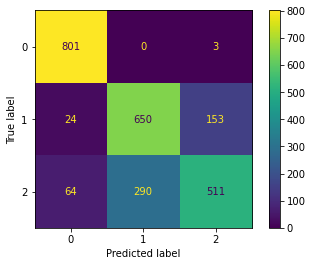

In [100]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Y_test,predicted)*100)  
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100)
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [200]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(n_estimators = 100)
ADA.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100)

In [201]:
# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = ADA.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")

Accuracy Score:  56.96926375982845 %


Accuracy :  56.96926375982845
Report : 
               precision    recall  f1-score   support

           0       0.09      0.02      0.03       133
           1       0.24      0.02      0.04       443
           2       0.59      0.95      0.73       823

    accuracy                           0.57      1399
   macro avg       0.31      0.33      0.26      1399
weighted avg       0.43      0.57      0.44      1399

F1 Score :  26.485635052553214


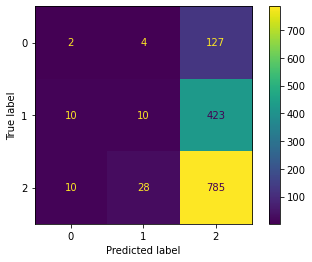

In [202]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Y_test,predicted)*100)  
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100)
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [204]:
# from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
GBC.fit(X_train, Y_train)

KeyboardInterrupt: 

Accuracy Score:  60.416666666666664 %
Report : 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       804
           1       0.53      0.42      0.47       827
           2       0.55      0.67      0.61       865

    accuracy                           0.60      2496
   macro avg       0.61      0.60      0.60      2496
weighted avg       0.60      0.60      0.60      2496

F1 Score :  60.11570704566468


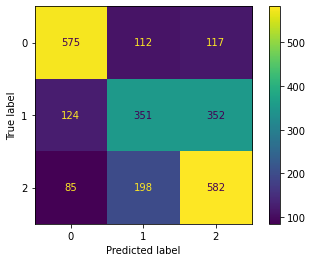

In [156]:
# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = GBC.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score*100, "%")
print("Report : \n", classification_report(Y_test, predicted))
print("F1 Score : ",f1_score(Y_test, predicted, average='macro')*100)
cm = confusion_matrix(Y_test, predicted, labels = DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Flask

In [205]:
# saving the best model for the application
import pickle
# saving the model
pickle.dump(ADA, open('model_ADABoost.pkl', 'wb'))

In [163]:
X_train[3].shape

(1, 12931)